In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd

np.random.seed(0)

In [5]:
X, y = make_blobs(
    n_samples=600,
    centers=[[-2,-2],[0,3],[3,-1]],
    n_features=2,
    random_state=42
)

Y = np.eye(3)[y]

In [6]:
X

array([[-1.77590752, -1.9874076 ],
       [ 2.9803622 , -0.44751005],
       [-2.81822068,  0.09238728],
       ...,
       [ 5.40341559, -1.0576188 ],
       [-1.34818542,  3.74326409],
       [-0.92323325,  1.64831539]])

In [7]:
Y

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

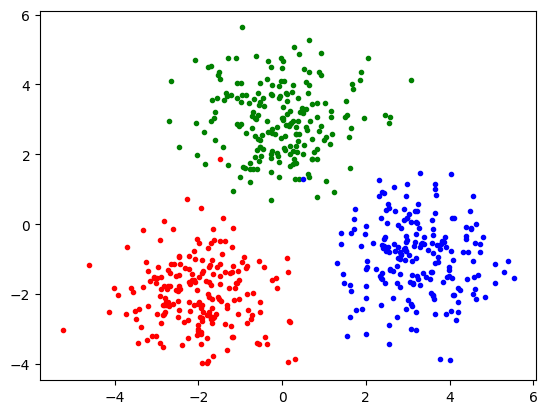

In [10]:
fig = plt.figure()
for i in range(len(y)):
    if y[i] == 0:
        plt.plot(X[i,0], X[i,1], c='r', marker='o',ms=3)
    elif y[i]==1 :
        plt.plot(X[i,0], X[i,1], c='g', marker='o',ms=3)
    else:
      plt.plot(X[i,0], X[i,1], c='b', marker='o',ms=3)

plt.show()

In [14]:
import numpy as np

class NeuralNetwork(object):
    def __init__(self):
        inputLayerNeurons = 2
        hiddenLayer1Neurons = 10
        hiddenLayer2Neurons = 10
        outLayerNeurons = 3

        self.learning_rate = 0.2
        self.W_H1I = np.random.randn(inputLayerNeurons, hiddenLayer1Neurons)
        self.W_H2H1 = np.random.randn(hiddenLayer1Neurons, hiddenLayer2Neurons)
        self.W_OH2 = np.random.randn(hiddenLayer2Neurons, outLayerNeurons)

    def sigmoid(self, x, der=False):
        if der:
            return x * (1 - x)
        else:
            return 1 / (1 + np.exp(-x))

    def feedForward(self, X):
        X = np.asarray(X, dtype=float)
        if X.ndim == 1:   # reshape if single sample
            X = X.reshape(1, -1)

        hidden1_input = np.dot(X, self.W_H1I)
        self.hidden1_output = self.sigmoid(hidden1_input)

        hidden2_input = np.dot(self.hidden1_output, self.W_H2H1)
        self.hidden2_output = self.sigmoid(hidden2_input)

        output_input = np.dot(self.hidden2_output, self.W_OH2)
        pred = self.sigmoid(output_input)
        return pred

    def backForward(self, X, Y, pred):
        X = np.asarray(X, dtype=float)
        if X.ndim == 1:   # reshape if single sample
            X = X.reshape(1, -1)
        Y = np.asarray(Y, dtype=float).reshape(X.shape[0], -1)

        output_error = Y - pred
        output_delta = self.learning_rate * output_error * self.sigmoid(pred, der=True)

        hidden2_error = output_delta.dot(self.W_OH2.T)
        hidden2_delta = self.learning_rate * hidden2_error * self.sigmoid(self.hidden2_output, der=True)

        hidden1_error = hidden2_delta.dot(self.W_H2H1.T)
        hidden1_delta = self.learning_rate * hidden1_error * self.sigmoid(self.hidden1_output, der=True)

        # weight updates
        self.W_H1I += X.T.dot(hidden1_delta)
        self.W_H2H1 += self.hidden1_output.T.dot(hidden2_delta)
        self.W_OH2 += self.hidden2_output.T.dot(output_delta)

    def train(self, X, Y):
        output = self.feedForward(X)
        self.backForward(X, Y, output)


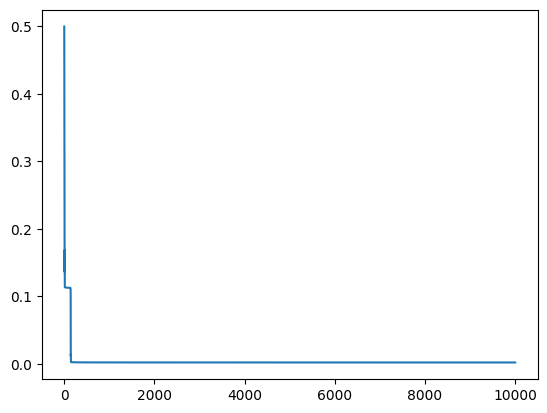

In [15]:
NN=NeuralNetwork()

err=[]

for i in range(10000):
  NN.train(X,Y)
  err.append(np.mean(np.square(Y-NN.feedForward(X))))
plt.plot(err)

In [18]:
print(NN.feedForward([-1.77590752, -1.9874076]))

[[9.99998213e-01 1.19968998e-09 1.16864896e-08]]


In [19]:
print(NN.feedForward([2.9803622 , -0.44751005]))

[[5.44579255e-04 3.79960943e-04 9.99692288e-01]]


In [20]:
print(NN.feedForward([-1.34818542,  3.74326409]))

[[5.72914366e-03 9.84232222e-01 3.59138275e-06]]
